In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics # to check model accuracy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif

In [ ]:
#importing Dataset
data = pd.read_csv("house_price.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
len(data['waterfront'].unique())

2

In [ ]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
date,70
price,1741
bedrooms,10
bathrooms,26
sqft_living,566
sqft_lot,3113
floors,6
waterfront,2
view,5
condition,5


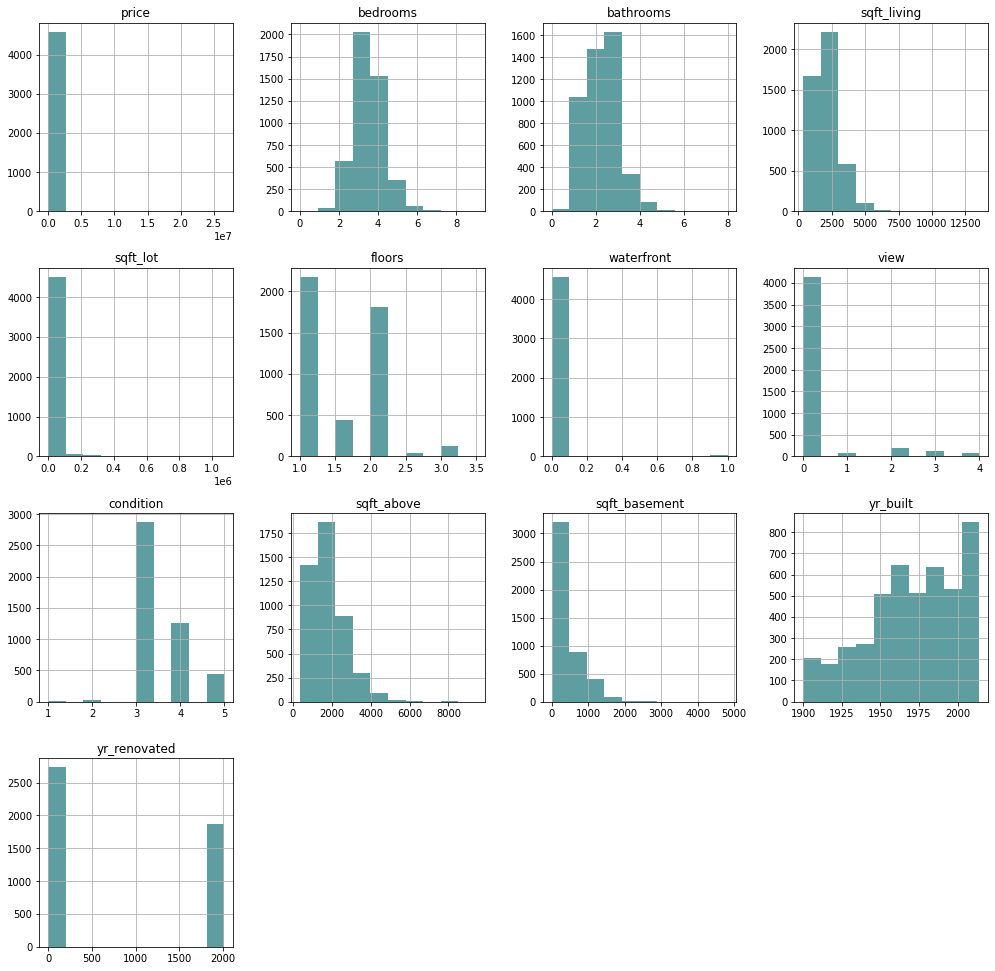

In [ ]:
data.hist(figsize = (17,17), color = "#5F9EA0")
plt.show() 

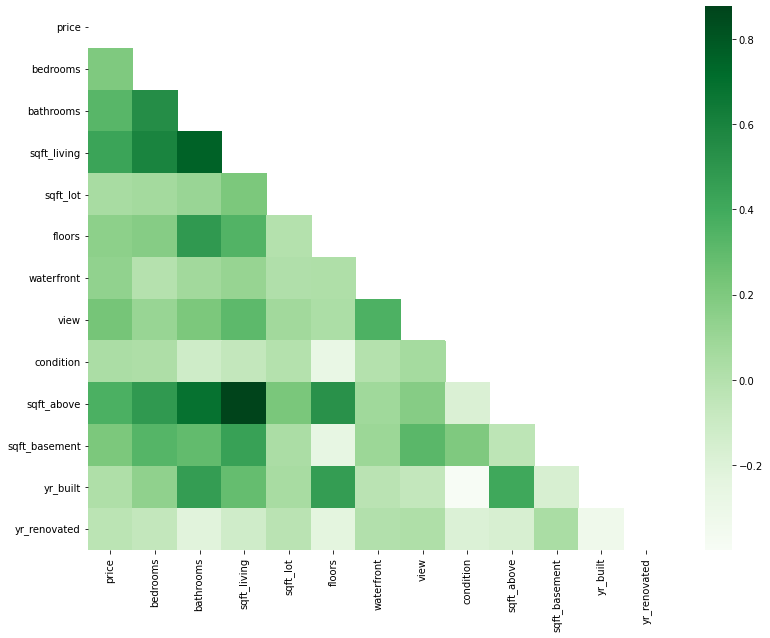

In [ ]:
plt.figure(figsize=(13, 10))
corr_data = data.drop(['date'], axis=1)
cor = corr_data.corr()
corr_mask = np.triu(cor)
sns.heatmap(cor, mask=corr_mask, cmap='Greens')
plt.show()


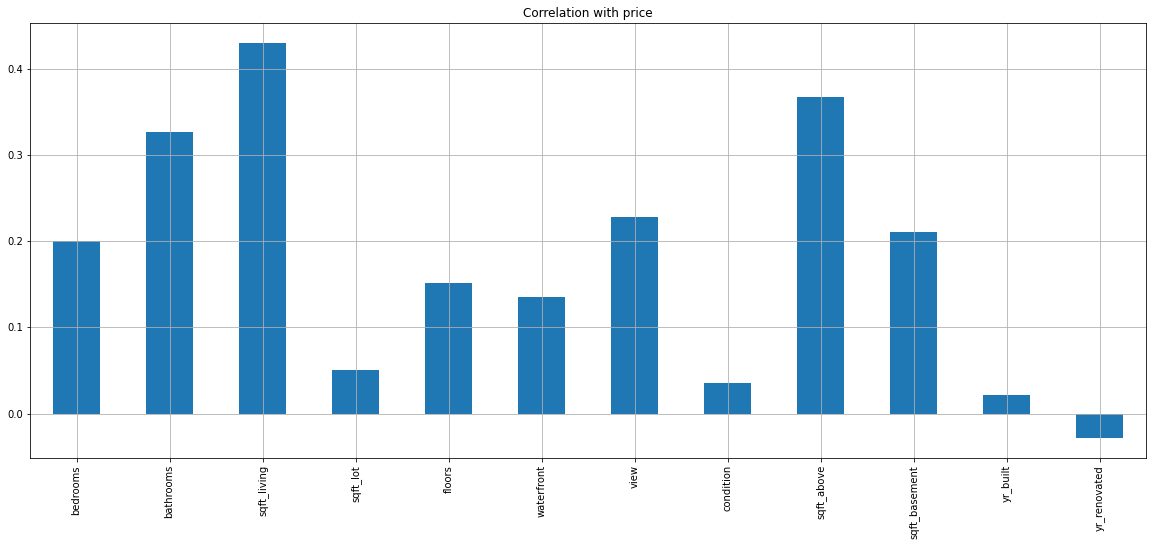

In [ ]:
data.drop(['price'], axis=1).corrwith(data.price).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with price");

In [ ]:
data['city_code']=data['city'].apply({'Shoreline':0,'Seattle':1,'Kent':2,'Bellevue':3,'Redmond':4,'Maple Valley':5,'North Bend':6,'Lake Forest Park':7,
                                 'Sammamish':8,'Auburn':9,'Des Moines':10,'Bothell':11,'Federal Way':12,'Kirkland':13,'Issaquah':14,
                                 'Woodinville':15,'Normandy Park':16,'Fall City':17,'Renton':18,'Carnation':19,'Snoqualmie':20,
                                 'Duvall':21,'Burien':22,'Covington':23,'Inglewood-Finn Hill':24,'Kenmore':25,'Newcastle':26,'Mercer Island':27,
                                 'Black Diamond':28,'Ravensdale':29,'Clyde Hill':30,'Algona':31,'Skykomish':32,'Tukwila':33,'Vashon':34,
                                 'Yarrow Point':35,'SeaTac':36,'Medina':37,'Enumclaw':38,'Snoqualmie Pass':39,'Pacific':40,'Beaux Arts Village':41,
                                'Preston':42,'Milton':43}.get)

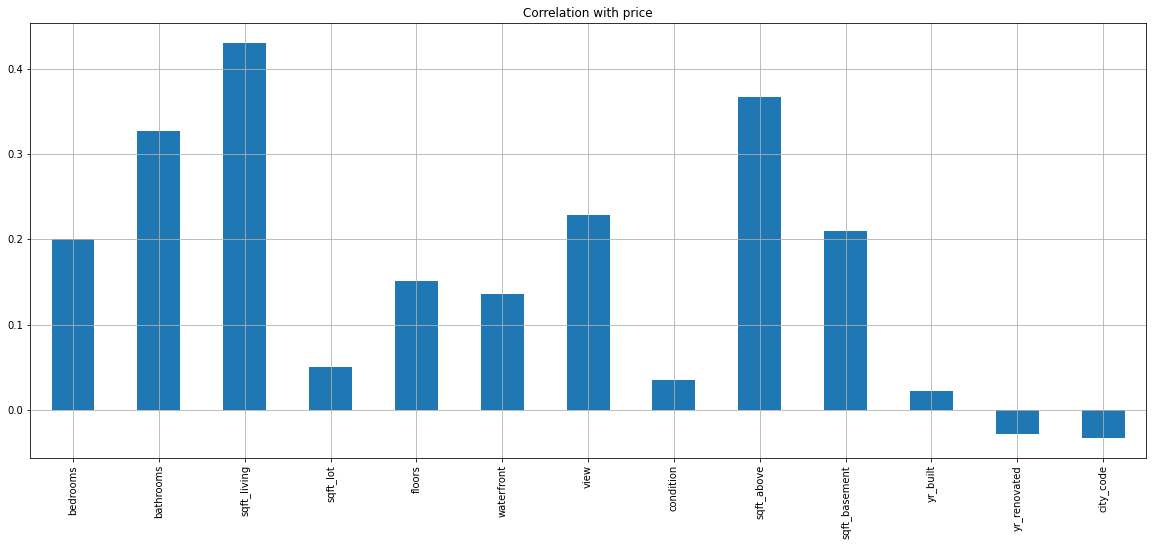

In [ ]:
data.drop(['price'], axis=1).corrwith(data.price).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with price");

In [ ]:
#Pearson Feature Selection
corr_data = data.drop(['date', 'city'], axis=1)
cor = corr_data.corr()
cor_target = abs(cor["price"])
#Selecting highly correlated features
pearson_features = cor_target[cor_target>0.1]
pearson_features

price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
floors           0.151461
waterfront       0.135648
view             0.228504
sqft_above       0.367570
sqft_basement    0.210427
Name: price, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
 18  city_cod

In [ ]:
data = data.drop(['country', 'statezip','street', 'date'], axis= 1)

In [ ]:
data['price'].replace(0, np.nan, inplace=True)
data['price'].fillna(data['price'].mean(), inplace=True)

In [ ]:
#no feature selection #better
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'city']
num_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_above', 'sqft_above', 'yr_built', 'yr_renovated'] 
bin_cols = ['waterfront']

# columns for pearson feature selection
#cat_cols = ['bedrooms', 'bathrooms', 'floors', 'view', 'city']
#num_cols = ['sqft_living', 'sqft_basement', 'sqft_above', 'sqft_above'] 


In [ ]:
x = data.drop("price", axis=1) 
y = data['price']

In [ ]:
#scaler = MinMaxScaler()
scaler = StandardScaler() # better
#scaler = MaxAbsScaler()
X=x.copy()
X[num_cols] = scaler.fit_transform(X[num_cols])
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,city_code
0,3.0,1.50,-0.829971,-0.193434,1.5,0,0,3,-0.565224,-0.672464,-0.531014,1.221670,Shoreline,0
1,5.0,2.50,1.568528,-0.161718,2.0,0,4,5,1.789559,-0.069128,-1.674693,-0.825693,Seattle,1
2,3.0,2.00,-0.217367,-0.080978,1.0,0,0,4,0.119171,-0.672464,-0.161000,-0.825693,Kent,2
3,3.0,2.25,-0.144686,-0.190145,1.0,0,0,4,-0.959621,1.482306,-0.261913,-0.825693,Bellevue,3
4,4.0,2.50,-0.206984,-0.121306,1.0,0,0,4,-0.797222,1.051352,0.175376,1.208396,Redmond,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,-0.653458,-0.236689,1.0,0,0,4,-0.368025,-0.672464,-0.564651,1.195121,Seattle,1
4596,3.0,2.50,-0.705374,-0.202882,2.0,0,0,3,-0.426025,-0.672464,0.410840,1.225755,Bellevue,3
4597,3.0,2.50,0.904009,-0.218462,2.0,0,0,3,1.371962,-0.672464,1.285418,-0.825693,Renton,18
4598,4.0,2.00,-0.051238,-0.229164,1.0,0,0,3,-0.878421,1.525401,0.108101,-0.825693,Seattle,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
X[encoded_cols] = encoder.transform(X[cat_cols])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
XN = X[num_cols + encoded_cols + bin_cols]

XN.columns.duplicated()
XN = XN.T.drop_duplicates().T

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(XN, y, test_size=0.1, random_state=40 )

In [ ]:
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet



models = [GradientBoostingRegressor(),
          KNeighborsRegressor(),
          BayesianRidge(),
          Ridge(),
          ElasticNet(),
          LinearRegression(),
          RandomForestRegressor(),
          SGDRegressor(),
          XGBRegressor()
          ]

names = ['GradientBoostingRegressor',
         'KNeighborsRegressor',
         'BayesianRidge',
         'Ridge',
         'ElasticNet',
         'LinearRegression',
         'RandomForestRegressor',
         'SGDResgressor',
         'XGBRegressor'
         ]



In [ ]:
overall_accuracy = []
train_accuracy = []
test_accuracy = []

R2_score = []
RMSE_score = []

for name in models:
    model = name
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    overall_score = model.score(XN,y)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    large_error_score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_accuracy_score = r2_score(y_test, y_pred)

    RMSE_score.append(large_error_score)
    R2_score.append(r2_accuracy_score)
    overall_accuracy.append(overall_score)
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)


[12:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
evaluation = pd.DataFrame({'Models': names,
                           'Overall_accuracy': overall_accuracy,
                           'Train_accuracy': train_accuracy,
                           'Test_accuracy': test_accuracy,
                           'R_Squared': R2_score,
                           'RMSE': RMSE_score})

evaluation

,Models,Overall_accuracy,Train_accuracy,Test_accuracy,R_Squared,RMSE
0,GradientBoostingRegressor,0.538664,0.533621,0.603103,0.603103,299976.900550
1,KNeighborsRegressor,0.379390,0.370493,0.493264,0.493264,338953.213728
2,BayesianRidge,0.269970,0.243349,0.611904,0.611904,296632.212278
3,Ridge,0.284225,0.256544,0.639810,0.639810,285768.841651
4,ElasticNet,0.205951,0.186013,0.461783,0.461783,349323.411786
5,LinearRegression,0.285119,0.257947,0.634157,0.634157,288002.550072
6,RandomForestRegressor,0.878194,0.901594,0.576834,0.576834,309744.759631
7,SGDResgressor,0.269845,0.242642,0.619265,0.619265,293805.829121
8,XGBRegressor,0.478979,0.474541,0.535562,0.535562,324498.401685


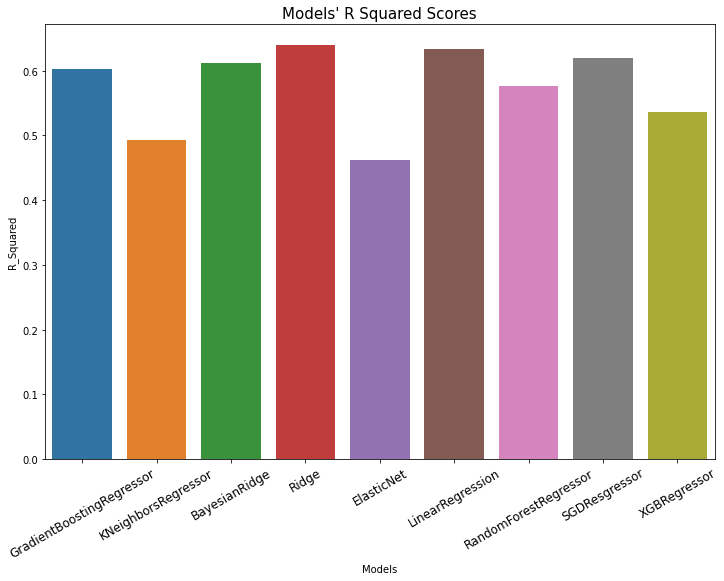

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = evaluation["Models"], y = evaluation["R_Squared"])
plt.title("Models' R Squared Scores", size = 15)
plt.xticks(rotation = 30, size = 12)
plt.show()

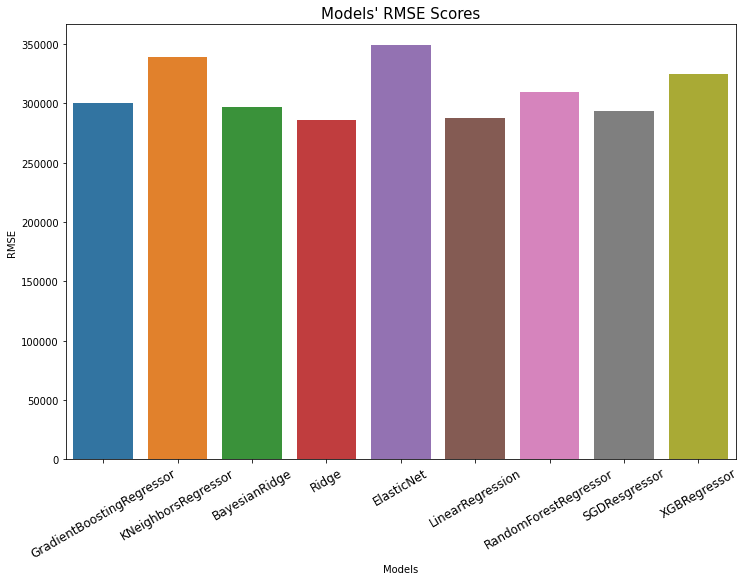

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = evaluation["Models"], y = evaluation["RMSE"])
plt.title("Models' RMSE Scores", size = 15)
plt.xticks(rotation = 30, size = 12)
plt.show()

In [ ]:
evaluation.sort_values(by="R_Squared",ascending=False)

,Models,Overall_accuracy,Train_accuracy,Test_accuracy,R_Squared,RMSE
3,Ridge,0.284225,0.256544,0.639810,0.639810,285768.841651
5,LinearRegression,0.285119,0.257947,0.634157,0.634157,288002.550072
7,SGDResgressor,0.269845,0.242642,0.619265,0.619265,293805.829121
2,BayesianRidge,0.269970,0.243349,0.611904,0.611904,296632.212278
0,GradientBoostingRegressor,0.538664,0.533621,0.603103,0.603103,299976.900550
6,RandomForestRegressor,0.878194,0.901594,0.576834,0.576834,309744.759631
8,XGBRegressor,0.478979,0.474541,0.535562,0.535562,324498.401685
1,KNeighborsRegressor,0.379390,0.370493,0.493264,0.493264,338953.213728
4,ElasticNet,0.205951,0.186013,0.461783,0.461783,349323.411786


In [ ]:
evaluation.sort_values(by="RMSE",ascending=True)

,Models,Overall_accuracy,Train_accuracy,Test_accuracy,R_Squared,RMSE
3,Ridge,0.284225,0.256544,0.639810,0.639810,285768.841651
5,LinearRegression,0.285119,0.257947,0.634157,0.634157,288002.550072
7,SGDResgressor,0.269845,0.242642,0.619265,0.619265,293805.829121
2,BayesianRidge,0.269970,0.243349,0.611904,0.611904,296632.212278
0,GradientBoostingRegressor,0.538664,0.533621,0.603103,0.603103,299976.900550
6,RandomForestRegressor,0.878194,0.901594,0.576834,0.576834,309744.759631
8,XGBRegressor,0.478979,0.474541,0.535562,0.535562,324498.401685
1,KNeighborsRegressor,0.379390,0.370493,0.493264,0.493264,338953.213728
4,ElasticNet,0.205951,0.186013,0.461783,0.461783,349323.411786


Ridge model has highest R squared value and lowest RMSE value. Therefore, the best model is Ridge.